In [1]:
import os
import numpy as np
from py3helpers.aws import AwsS3
from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import pandas as pd
from scipy.stats import norm, entropy, pearsonr
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
alt_c_positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/alt_canonical_distribution/yeast_18S_25S_variants.positions"
# positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, alt_c_positions, mods_csv)


In [4]:
_ivt_and_native="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/ivt_and_native_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers_ivt_and_native_training"
_30_rounds="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0"
_native_all_kmers="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/only_covered_kmers_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers"
_unsup_60="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_60_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_70="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_70_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_80_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_90="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_90_no_ivt="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false"
_unsup_alt_can_90="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false"
_alt_can="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false"
_alt_can_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.80_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"
# round 5 from alt_c used for continuing training
_unsup_alt_can_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.80_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false_alt_c_6mer"
_median_30 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_0/"
_mrna_trained_30 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/trained_mRNA_model/standard/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_false_unsupervised_false_all_kmers_false"
_alt_can_60 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian_60/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"
_alt_can_all_k = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_true_alt_c_6mer"
_small_09 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.9_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"
_small_08 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.8_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"
_small_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"
_small_06 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.6_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"
_small_05 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer"

_median_small_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true"


In [5]:
def plot_recall_vs_fraction(experiments, experiment_names, round_n, kmer_pos_mapping, figure_path=None, threshold=0.3):
    f, panel1 = plt.subplots(figsize=(8, 8))
    panel1.set_title(f'Recall vs Annotated Frequency Modified')
    panel1.set_xlabel(f"Fraction modified")
    panel1.set_ylabel("Recall")
    linspace = np.linspace(.5,1,100)
    legends = []
    for experiment, name in zip(experiments, experiment_names):
        print(name)
        df = preprocess_accuracy_csv(os.path.join(experiment, f"training_accuracy_csvs/{round_n}_per_position_data_0.5.csv"), kmer_pos_mapping.subset_mod_data)
        if df.isnull().values.any():
            print(f"Warning, {name} has missing values")
            df = df.dropna()
        pearson_r, pvalue = pearsonr(df["fraction"], df["recall"])
        ax = panel1.scatter(df["fraction"], df["recall"], label=f"{name} \n Pearson correlation: {round(pearson_r, 3)}")
        legends.append(ax)
        text_df = df[np.abs(df["recall-frac"]) > threshold]
        for i, x in text_df.iterrows():
            panel1.text(x.fraction, x.recall, f"{x.contig} {x.reference_index}")
        m, b = np.polyfit(df["fraction"], df["recall"], 1)
#         ax, = panel1.plot(linspace, m * linspace + b,
#                     label=f"{name}: slope={round(m, 4)} \n intercept={round(b, 4)}")
#         legends.append(ax)
#     panel1.legend(handles=legends, loc="upper left")

    ax, = panel1.plot(linspace, linspace, '-r', linewidth=5, label='Perfect Match')
    legends.append(ax)

    panel1.legend(handles=legends, loc="upper left")
    if figure_path is not None:
#         assert not os.path.exists(figure_path), "Save fig path does exist: {}".format(figure_path)
        plt.savefig(figure_path)
    else:
        plt.show()



In [6]:
figure_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/recall_vs_fraction_modified/recall_vs_fraction_median_small_07.svg"       
# figure_path = None
round_n = 30
# experiments = [_alt_can, _small_09, _small_07, _small_06, _small_05, _median_small_07]
# experiment_names = ["alt_can", "_small_09", "_small_07", "_small_06", "_small_05", "_median_small_07"]
experiments = [_median_small_07]
experiment_names = ["IVT and Native Trained Model"]


<IPython.core.display.Javascript object>


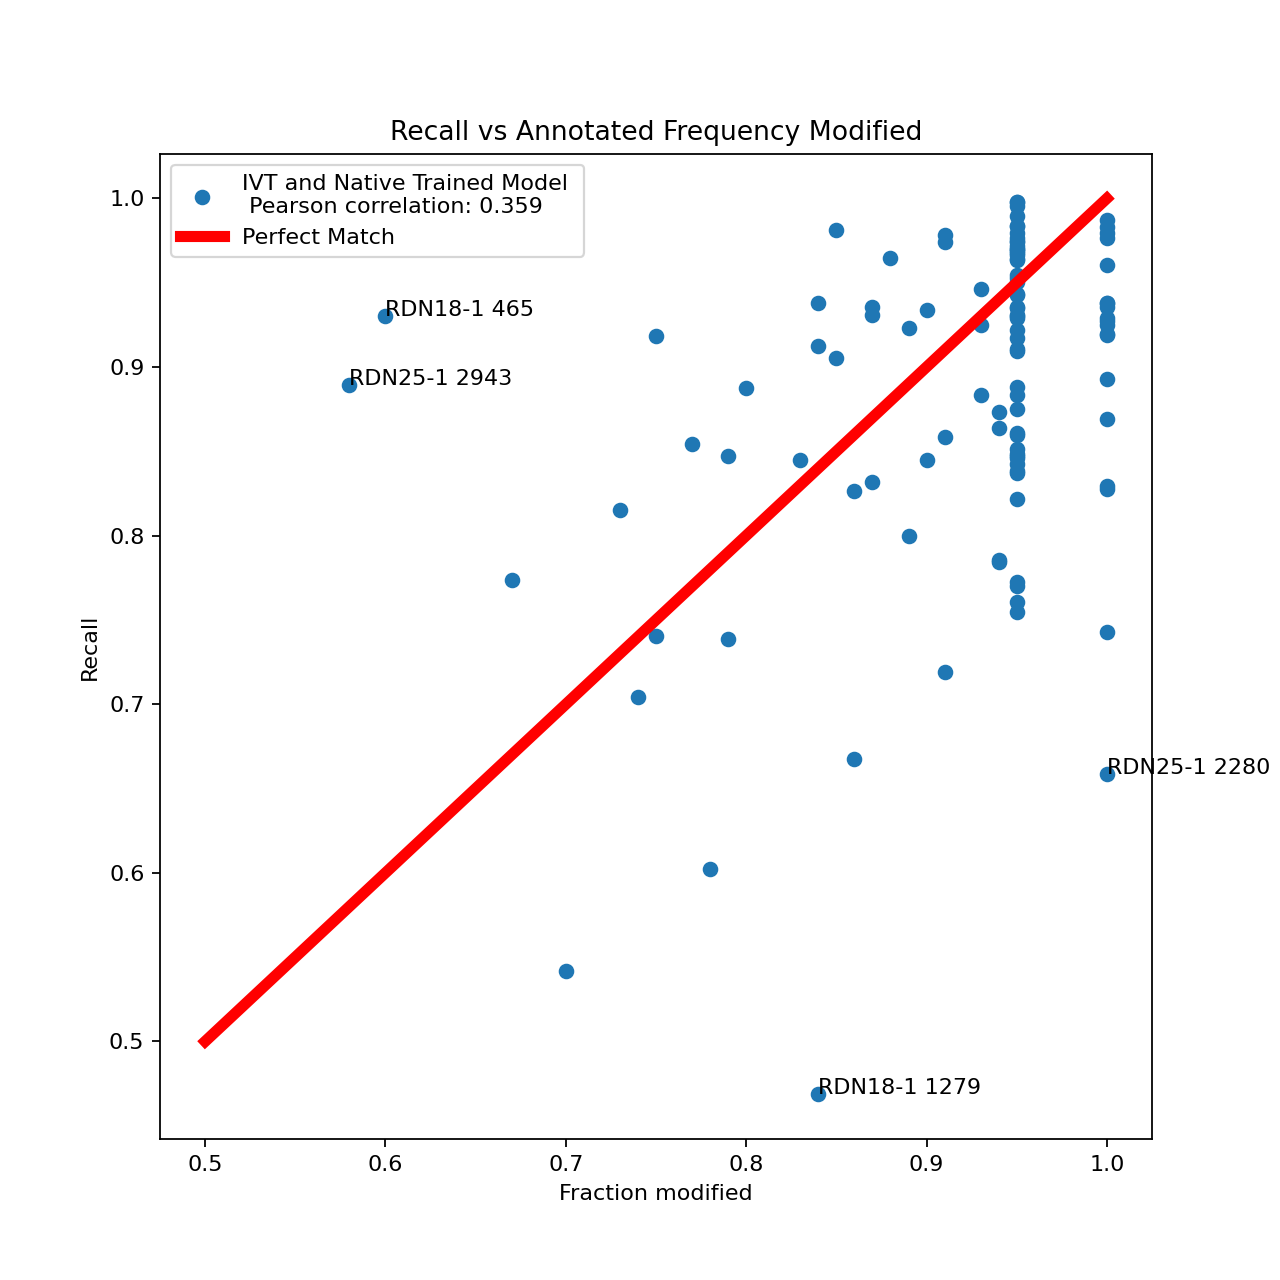

IVT and Native Trained Model
Warning, IVT and Native Trained Model has missing values


In [8]:
%matplotlib notebook
# matplotlib.use('SVG')
# plt.rcParams['svg.fonttype'] = 'none'
figure_path = None
plot_recall_vs_fraction(experiments, experiment_names, round_n, kpm, figure_path=figure_path)
